In [19]:
import numpy as np
import struct
from math import *
from scipy.signal import convolve2d

width = 240
height = 180

def load_img(name, width = width, height=height):
    with open(rf"v6/{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("d", fileContent):
        img[x,y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def gaussian_kernel_2d(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*pi*sigma**2)) * np.exp(
            (-1*((x-(size-1)/2)**2 + (y-(size-1)/2)**2))/(2*sigma**2)
        ),
        (size, size)
    )
    return kernel / np.sum(kernel)

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)


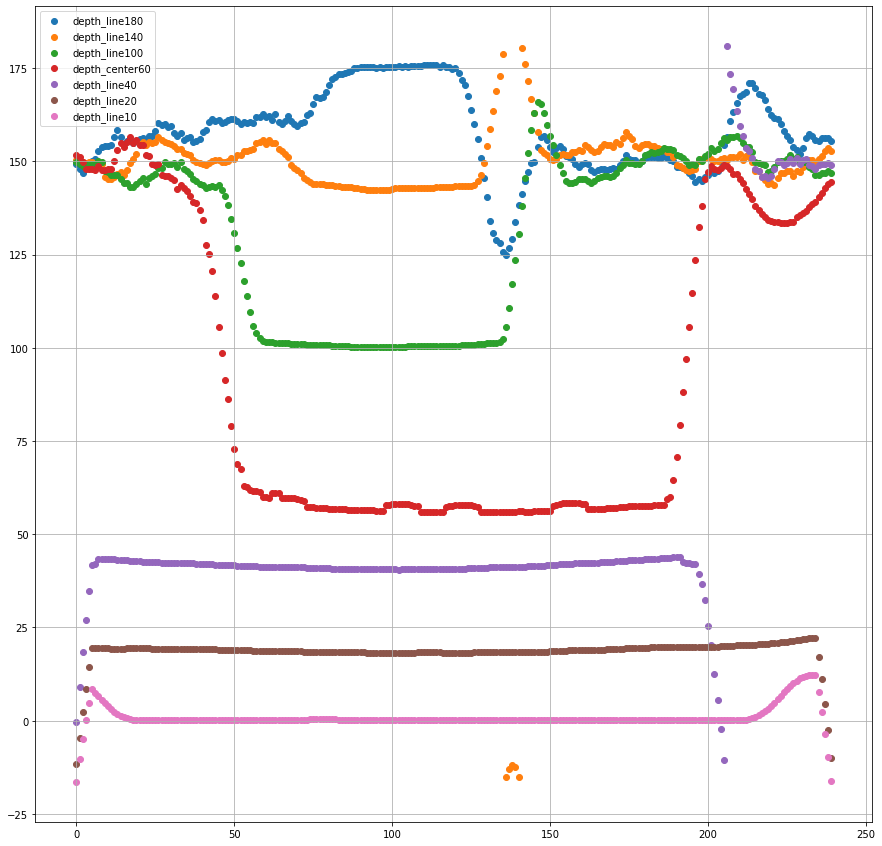

In [98]:
kernel_size = 11
sigma = 6
gaussian_kern = gaussian_kernel_2d(kernel_size, sigma)

def convert(d):
    if d < -1:
        d = d + 2 * pi
    return 150 - 31.83098861837907 * d

def draw(ax, name):
    x = range(width)
    filtered = convolve2d(load_img(name), gaussian_kern, mode='same')
    ax.scatter(x, [convert(filtered[i,90]) for i in x], label=name)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

#draw(ax, "depth_line200")
draw(ax, "depth_line180")
draw(ax, "depth_line140")
draw(ax, "depth_line100")
draw(ax,"depth_center60")
draw(ax, "depth_line40")
draw(ax, "depth_line20")
draw(ax, "depth_line10")

#draw(ax,"depth_center6")


ax.grid(True)
ax.legend()
#ax.set_ylim(-1.5,-1.2)

    
plt.show()

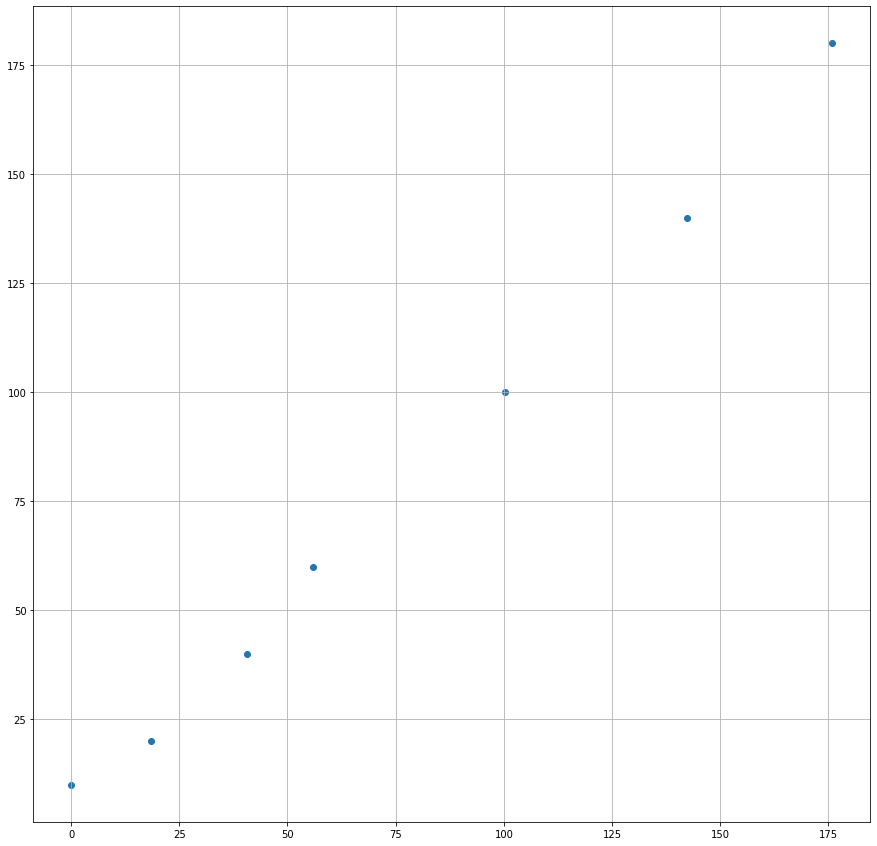

In [97]:
points = {}
points[10] = -1.573
points[20] = -2.154
points[40] = -2.850
points[60] = 2.957
points[100] = 1.565
points[140] = 0.243
points[180] = -0.813
#points[200] = -1.37

def countY(c, x):
    v = 0
    for k in c:
        v = v * x + k
    return v

def countC(img, y0):
    xd = []
    yd = []
    for x in range(width):
        d = img[x,y0]
        xd.append(x)
        yd.append(d)
    return np.polyfit(xd, yd, 2)


def convert(d):
    if d < -1:
        d = d + 2 * pi
    return 150 - 31.83098861837907 * d

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

x = sorted(points.keys())
y = [convert(points[i]) for i in x]

ax.scatter(y,x)
#pf = np.polyfit(y,x, 1)
#pf2 = [31.83098861837907, 150]
#print(pf)
#ax.plot([-5,1],[countY(pf,-5),countY(pf,1)])
#ax.plot([-5,1],[countY(pf2,-5),countY(pf2,1)])


ax.grid(True)
#ax.legend()


In [95]:
f = 375e5
c = 3e8
k = 100 * c / (8 * pi *f)
print(k)

31.83098861837907
